# Business Understanding

### Columns and description of dataset

1. ID: Unique number to represent patient ID
2. PRG: Plasma glucose
    Hyperglycemia (high levels of plasma glucose) is commonly associated with sepsis.
3. PL: Blood Work Result-1 (mu U/ml)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2)
    Both underweight and obesity can weaken the immune system.  
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: Patients age (years)
    Age is a significant factor in the risk and outcomes associated with sepsis. 
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: (Target) 
    * Positive: if a patient in ICU will develop a sepsis
    * Negative: otherwise 

Sepsis:- the body's overwhelming and dysregulated response to an infection
// 1. The immune system is not able to effectively fight off a bacterial or viral infection, leading to inflammation



Goal: Build a model to predict if an ICU patient will develop a sepsis 

Null Hypothesis: There is no association between elevated plasma glucose levels and patients developing sepsis. 

Alternate Hypothesis: Elevated plasma glucose levels are associated with petients developing sepsis. 

Analytical Questions
1. What is the effect of age on developing sepsis
2. Is there any correlation between age and sepsis?
3. Does having high plasma glucose level increase the risk for sepsis?
4. How does the presence of antibiotics affect the development of sepsis in patients admitted to intensive care unit (ICU)?
5. Is there any correlation betweeen insurance holders and sepsis?
6. Can we use other factors such as renal failure, liver disease, or heart failure in our prediction model?
7. Are there any differences in the development of sepsis based on race/ethnicity?
8. Could elevated creatinine levels be used as a factor in predicting sepsis?
9. Would it be beneficial to include other medical conditions like pneumonia, urinary tract infection, or gastrointestinal ble
10. Would it be beneficial to include additional variables like kidney dysfunction, liver dysfunction, or heart failure in our model


## Data Understanding

1. Data Collection
The data collection process is the first step in the analysis of a dataset, and it involves gathering all relevant information from various sources to form a comprehension
2. Initial Data inspection
    * Get an overview of the dataset's size, dimensions, and structure
    *understand the data types(numeric, categorical, text)
3. Descriptive statistics 
    * compute summary statistics for each feature, such as mean, median, standard deviation, minimum, maximum, etc
4. Data Visualization
    *Create visualizations like histograms, box plots, scatter plots, and correlation matrices to explore the distribution and relationships between variables. 
    *identify patterns, trends, and potential outliers. 
5. Handle missing values
6. Data cleaning
    *clean the data by addressing inconsistencies, errors, or outliers
    *ensure that the data is in a format suitable for analysis 
7. Feature Engineering
    *Create new features or transform existing ones to enhance the predictive power of the model
    *Encode categorical

In [1]:
#pip install imbalanced-learn

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

import joblib


In [3]:
# Import Dataset

df=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_P6\P6-API_for_ML_model\Dataset\Paitients_Files_Train.csv')
df_test=pd.read_csv('Dataset\Paitients_Files_Test.csv')

In [4]:
#preview train dataset

df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
#preview test dataset

df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
# check information on train dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [8]:
# Map 'Positive' to 1 and 'Negative' to 0
df['Sepssis'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 46.9 KB


In [10]:
# check information on test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [11]:
df_test.drop('ID', axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        169 non-null    int64  
 1   PL         169 non-null    int64  
 2   PR         169 non-null    int64  
 3   SK         169 non-null    int64  
 4   TS         169 non-null    int64  
 5   M11        169 non-null    float64
 6   BD2        169 non-null    float64
 7   Age        169 non-null    int64  
 8   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 12.0 KB


In [12]:
print(df.shape)
print(df_test.shape)


(599, 10)
(169, 9)


### EDA

In [13]:
#check duplicates
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00
Sepssis,599.0,0.347245,0.476492,0.000,0.000,0.000,1.000,1.00


### Univariate Analysis

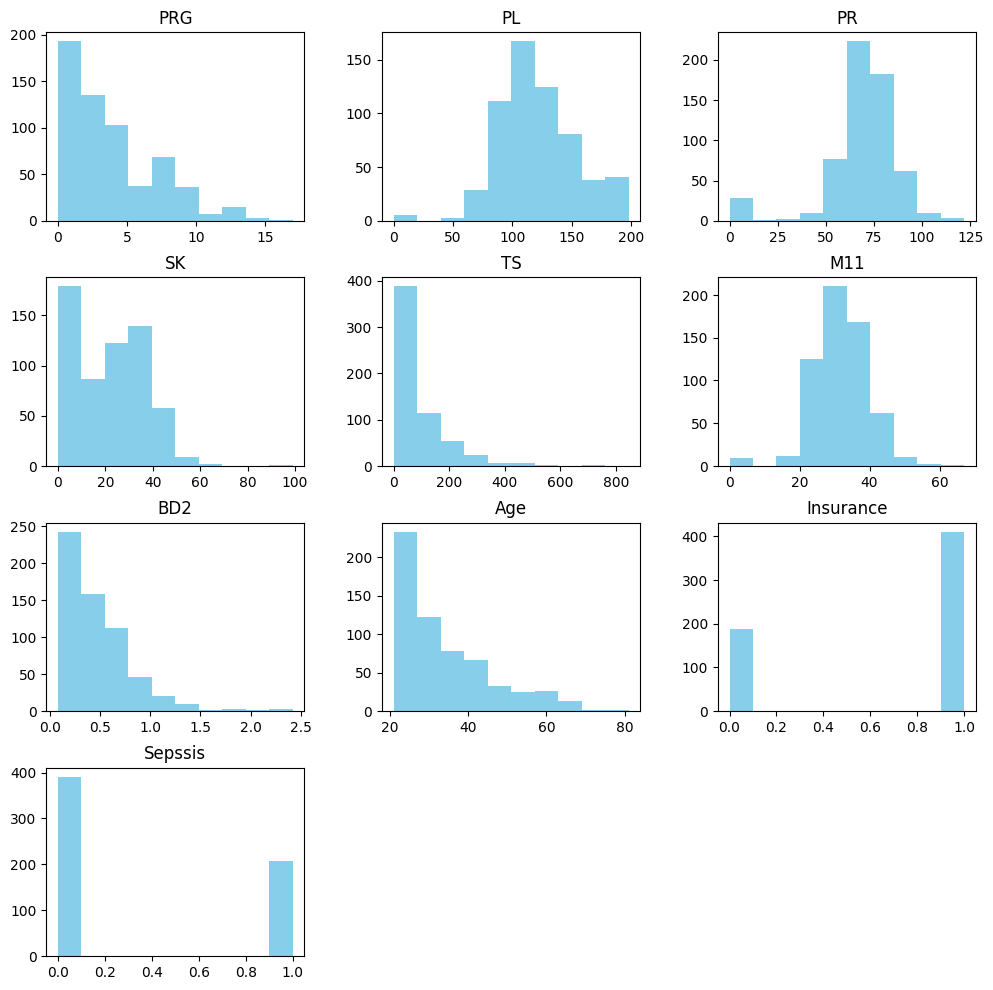

In [15]:
df.hist(figsize=(12,12), grid=False, color='skyblue')
plt.show()

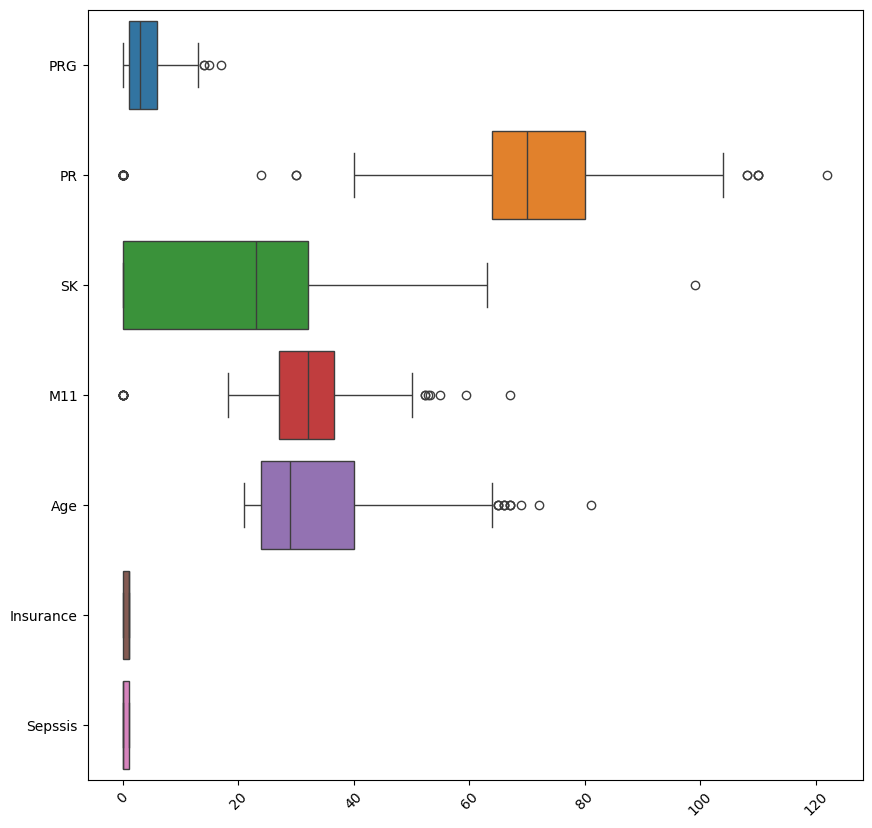

In [16]:
#create boxplots
#drop 'TS' and 'PL' which has a larger scale
#drop 'BD2' which is very small in scale

df_without=df.drop(['TS','PL','BD2'], axis=1)
plt.figure(figsize=(10,10))
sns.boxplot(data=df_without, orient='h')
plt.xticks(rotation=45)
plt.show()

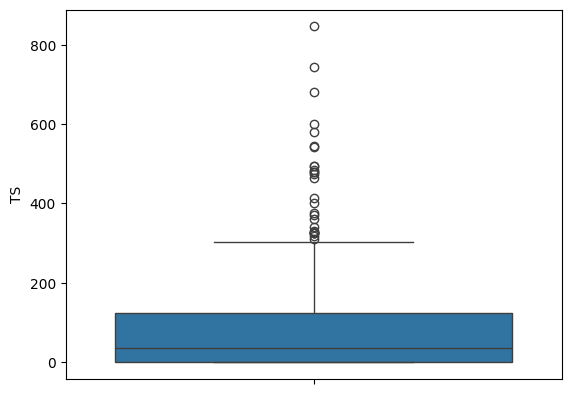

In [17]:
sns.boxplot(data=df['TS'])
plt.show()

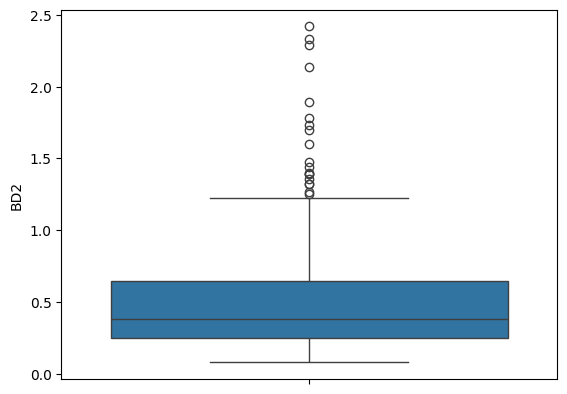

In [18]:
sns.boxplot(data=df['BD2'])
plt.show()

<Axes: >

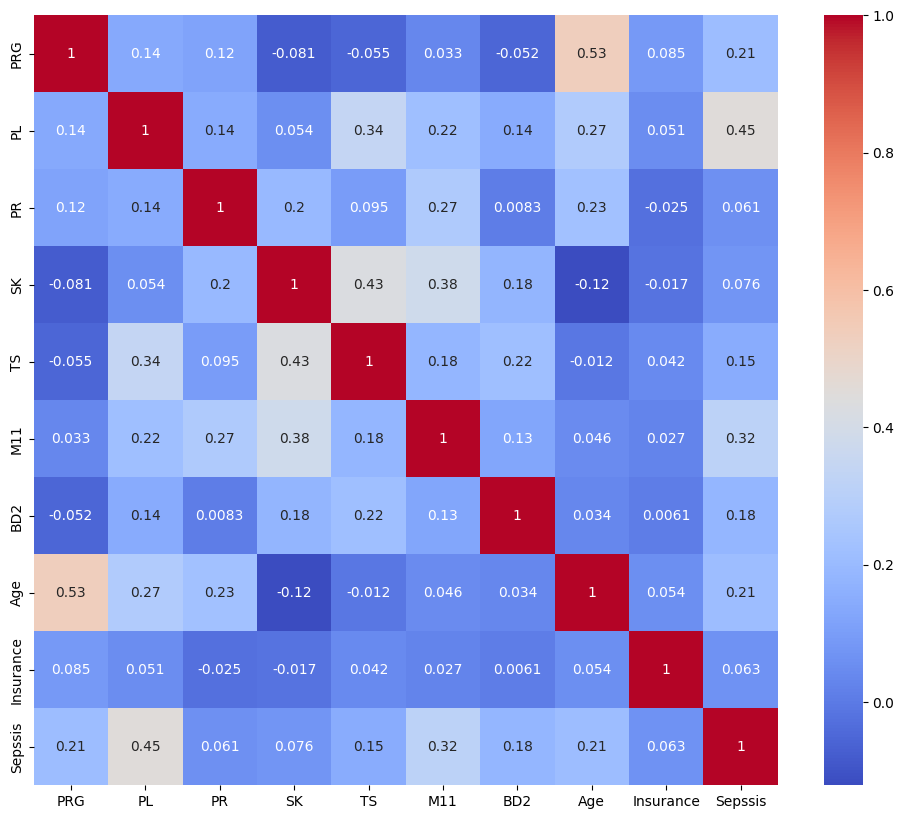

In [19]:
correlation=df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [20]:
df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

## Data Preparation

1. Split dataset
    *training - trains the model
    *validation - helps tune hyperparameters
    *test - evaluates model performance 
2. Create a pipeline to preprocess the data
    1. Scale
    2. Log Transformation
3. Encode
4. Split dataset into training and evaluation
5. Check balance - Balance Dataset (depending on what you see)

In [21]:
# Split dataset
# 'Sepssis' is the target variable (y) and other columns are features (X)

features = df.drop('Sepssis', axis=1)
labels = df['Sepssis']

# Split the data into training and evaluation sets
X, X_eval, y, y_eval = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


### Check balance and balance dataset

In [22]:
print("\nClass distribution before SMOTE:")
print(pd.Series(y).value_counts())


Class distribution before SMOTE:
Sepssis
0    313
1    166
Name: count, dtype: int64


In [23]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Sepssis
0    313
1    313
Name: count, dtype: int64


### Create Pipeline

In [24]:
input_features = X.columns
input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)


In [26]:
# KNeighborClassifier pipeline

neighbors=KNeighborsClassifier()

pipeline_KNN = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('neighbors', neighbors)
    ]
)

In [27]:
# random forest pipeline

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf_classifier', rf_classifier)
    ]
)

In [28]:
# Create a Gradient Boosting classifier
# Gradient Boosting pipeline

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

pipeline_gb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf_classifier', rf_classifier)
    ]
)

## Modeling

1. Train Model
    1. Train Model 1 - K-Nearest Neigbour (Distance model)
    2. Train Model 2 - Random Forest Classifier
    3. Train Model 3 - Gradient Boosting Classifier
2. Persit Model

In [29]:
# Train and model K-Nearest Neigbour

pipeline_KNN.fit(X_resampled,y_resampled)

knn_pred = pipeline_KNN.predict(X_eval)
print(classification_report(y_eval,knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        78
           1       0.52      0.76      0.62        42

    accuracy                           0.68       120
   macro avg       0.68      0.70      0.67       120
weighted avg       0.72      0.68      0.68       120



In [30]:
# Train and model Random Forest Classifier


pipeline_rf.fit(X_resampled,y_resampled)

rf_pred = pipeline_rf.predict(X_eval)
print(classification_report(y_eval,rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        78
           1       0.57      0.71      0.63        42

    accuracy                           0.71       120
   macro avg       0.69      0.71      0.70       120
weighted avg       0.73      0.71      0.71       120



In [31]:
# Train and model Gradient Boost Classifier

pipeline_gb.fit(X_resampled,y_resampled)

gb_pred = pipeline_gb.predict(X_eval)
print(classification_report(y_eval,gb_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        78
           1       0.57      0.71      0.63        42

    accuracy                           0.71       120
   macro avg       0.69      0.71      0.70       120
weighted avg       0.73      0.71      0.71       120



### Persiting the models

In [33]:

joblib.dump(pipeline_KNN, 'pipeline_KNN.joblib')
joblib.dump(pipeline_rf, 'pipeline_rf.joblib')
joblib.dump(pipeline_gb, 'pipeline_gb.joblib')


['pipeline_gb.joblib']